# Notebook Overview
This notebook is structured to address the following objectives:
1. **Preprocessing and Classification**: Perform appropriate preprocessing and classification on the given dataset.
2. **Handling Imbalanced Data**: Identify if the data is imbalanced and apply measures like SMOTE and feature extraction.
3. **Imputation**: Perform imputation using Scikit-learn's available imputers.
4. **Bagging and Boosting**: Apply bagging and boosting techniques.
5. **LDA and QDA**: Perform Linear Discriminant Analysis (LDA) and Quadratic Discriminant Analysis (QDA).
6. **Advanced Techniques**: Use techniques like Pipelines, Column Transformers, and hyperparameter tuning, referencing Scikit-learn documentation.
7. **Scaling and Imputing Comparison**: Compare different approaches to scaling and imputing and analyze their effects on model performance.
8. **Model Evaluation**: Evaluate the model using multiple metrics and justify the most appropriate ones for the given scenario.

## Step 1: Data Handling and Preprocessing
```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
data = pd.read_csv("dataset_task1.csv")
print(data.head())
data.info()
```


In [38]:
# Perform appropriate preprocessing and classification on the given dataset
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn: Preprocessing, Models, Metrics, and Pipelines
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Scikit-learn: Models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

# Imbalanced-learn: Handling Class Imbalance
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline # Renaming to avoid conflict with sklearn.pipeline

# Load dataset
data = pd.read_csv("dataset_task1.csv")
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [39]:
# Define features and target
# here 'TotalCharges' is assumed to be the target variable
features = data.drop(columns=['TotalCharges'])
target = data['TotalCharges']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


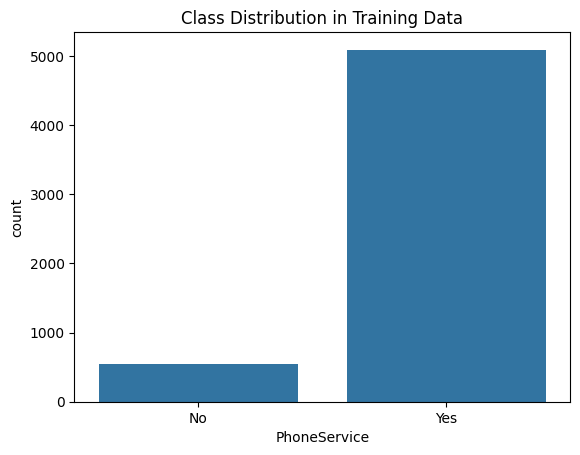

In [40]:
# Identify if the data is imbalanced and apply appropriate measures to handle it like SMOTE and feature extraction
# Display dataset information
data.info()

# Define features and target BEFORE encoding
features = data.drop(columns=['PhoneService'])
target = data['PhoneService']

# Convert non-numeric columns to numeric using encoding
for column in features.select_dtypes(include=['object']).columns:
    features[column] = features[column].astype('category').cat.codes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, target, 
    test_size=0.2, 
    random_state=404, 
    stratify=target
    )

# Visualize class distribution
sns.countplot(x=y_train)
plt.title('Class Distribution in Training Data')
plt.show()

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [41]:
# Split the data into training and testing sets which will be used later for model training and evaluation
# Using stratify to handle class imbalance if present
X_train, X_test, y_train, y_test = train_test_split(
    features, target, 
    test_size=0.2, 
    random_state=404, 
    stratify=target
    #it helps to maintains the same proportion of classes as the original dataset and not overpowering the minority class
)

In [42]:
# Perform Imputation based on Imputers available on Scikit Learn
imputer = SimpleImputer(strategy='mean', add_indicator=True)
X_train_imputed = imputer.fit_transform(X_train_smote)
X_test_imputed = imputer.transform(X_test)

In [43]:
# Feature scaling using StandardScaler and MinMaxScaler
# Standardization
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train_imputed)
X_test_standard = scaler_standard.transform(X_test_imputed)

# Normalization
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train_imputed)
X_test_minmax = scaler_minmax.transform(X_test_imputed)

In [44]:
# Encoding categorical features using OrdinalEncoder and OneHotEncoder on categorical columns only
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Ordinal Encoding pipeline (impute then encode)
ordinal_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])
X_train_ordinal = ordinal_pipeline.fit_transform(X_train[categorical_cols])
X_test_ordinal = ordinal_pipeline.transform(X_test[categorical_cols])

# One-Hot Encoding pipeline (impute then one-hot)
onehot_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])
X_train_onehot = onehot_pipeline.fit_transform(X_train[categorical_cols])
X_test_onehot = onehot_pipeline.transform(X_test[categorical_cols])

ValueError: at least one array or dtype is required

In [ ]:
# Handling class imbalance
# Step 1: Identify class imbalance using EDA
# Visualize class distribution
sns.countplot(x=y_train)
plt.title('Class Distribution in Training Data')
plt.show()

# Display value counts
print("Class distribution in training data:")
print(y_train.value_counts())

# Step 2: Apply oversampling techniques
# Random Oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train_imputed, y_train)

# SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_imputed, y_train)

# Step 3: Apply undersampling techniques
# Random Undersampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_imputed, y_train)

# Edited Nearest Neighbours
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours()
X_train_enn, y_train_enn = enn.fit_resample(X_train_imputed, y_train)

In [ ]:
# Use bagging and boosting techniques
# Bagging using Random Forest
bagging_model = RandomForestClassifier(n_estimators=100, random_state=42)
bagging_model.fit(X_train_imputed, y_train_smote)
print("Bagging (Random Forest) Training Accuracy:", bagging_model.score(X_train_imputed, y_train_smote))
print("Bagging (Random Forest) Testing Accuracy:", bagging_model.score(X_test_imputed, y_test))

# Boosting using Gradient Boosting
boosting_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
boosting_model.fit(X_train_imputed, y_train_smote)
print("Boosting (Gradient Boosting) Training Accuracy:", boosting_model.score(X_train_imputed, y_train_smote))
print("Boosting (Gradient Boosting) Testing Accuracy:", boosting_model.score(X_test_imputed, y_test))

In [ ]:
# Model Training and Selection: Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_smote, y_train_smote)
print("Logistic Regression Training Accuracy:", logistic_model.score(X_train_smote, y_train_smote))
print("Logistic Regression Testing Accuracy:", logistic_model.score(X_test_imputed, y_test))
# Model Training and Selection: Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_smote, y_train_smote)
print("Random Forest Training Accuracy:", random_forest_model.score(X_train_smote, y_train_smote))
print("Random Forest Testing Accuracy:", random_forest_model.score(X_test_imputed, y_test))
# Model Training and Selection: Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_smote, y_train_smote)
print("Gradient Boosting Training Accuracy:", gb_model.score(X_train_smote, y_train_smote))
print("Gradient Boosting Testing Accuracy:", gb_model.score(X_test_imputed, y_test))

In [ ]:
# Perform LDA and QDA on the dataset
# Linear Discriminant Analysis (LDA)
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_imputed, y_train_smote)
print("LDA Training Accuracy:", lda_model.score(X_train_imputed, y_train_smote))
print("LDA Testing Accuracy:", lda_model.score(X_test_imputed, y_test))

# Quadratic Discriminant Analysis (QDA)
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train_imputed, y_train_smote)
print("QDA Training Accuracy:", qda_model.score(X_train_imputed, y_train_smote))
print("QDA Testing Accuracy:", qda_model.score(X_test_imputed, y_test))

In [ ]:
# Heavily reference the scikit-learn documentation as well as reference videos and use techniques like Pipelines, Column Transformers and hyperparameter tuning
# Define preprocessing for numeric and categorical features based on original dtypes
X_full = data.drop(columns=[target.name])
numeric_cols = X_full.select_dtypes(include=['int64', 'float64']).columns
categorical_cols_for_ct = X_full.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols_for_ct)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

In [ ]:
# Compare different approaches to scaling and imputing and analyze how they affect the model performance
scaling_methods = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler()
}

imputing_methods = {
    'MeanImputation': SimpleImputer(strategy='mean'),
    'MostFrequentImputation': SimpleImputer(strategy='most_frequent')
}

results = []

for scaler_name, scaler in scaling_methods.items():
    for imputer_name, imputer in imputing_methods.items():
        numeric_transformer = Pipeline(steps=[
            ('imputer', imputer),
            ('scaler', scaler)
        ])

        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, features.select_dtypes(include=['int64', 'float64']).columns),
                ('cat', categorical_transformer, features.select_dtypes(include=['object']).columns)
            ]
        )

        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', RandomForestClassifier(random_state=42))
        ])

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        report = classification_report(y_test, y_pred, output_dict=True)
        results.append({
            'Scaler': scaler_name,
            'Imputer': imputer_name,
            'Accuracy': report['accuracy'],
            'Precision': report['weighted avg']['precision'],
            'Recall': report['weighted avg']['recall'],
            'F1-Score': report['weighted avg']['f1-score']
        })

results_df = pd.DataFrame(results)
print(results_df)

In [ ]:
# Evaluate the model using multiple metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Robust ROC AUC for binary or multiclass
y_proba = None
try:
    y_proba = best_model.predict_proba(X_test)
    if len(np.unique(y_test)) == 2:
        roc_auc = roc_auc_score(y_test, y_proba[:, 1])
    else:
        roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
except Exception:
    roc_auc = np.nan

conf_matrix = confusion_matrix(y_test, y_pred)

# Display metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

# Justification for metrics
print("\nJustification:")
print("Accuracy is a general metric but may not be sufficient in case of class imbalance.")
print("Precision and Recall are critical for imbalanced datasets, as they measure the ability to correctly identify positive cases and avoid false negatives.")
print("F1-Score provides a balance between Precision and Recall, making it suitable for imbalanced scenarios.")
print("ROC AUC is useful for evaluating the model's ability to distinguish between classes, especially in multi-class problems.")